In [2]:
import csv
import json

In [3]:
with open('baseline2layer_experiment_results_3.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    baseline2layer = list(reader)

with open('late_fuse2layer_experiment_results_3.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    late_fuse2layer = list(reader)
    

In [4]:
baseline2layer_n_epochs = list(map(lambda x: int(x['best_epoch']), baseline2layer))
late_fuse2layer_n_epochs = list(map(lambda x: int(x['best_epoch']), late_fuse2layer))

In [5]:
from scipy.stats import mannwhitneyu, ttest_ind

print("Performing Mann-Whitney U test on the number of epochs")
stat, p = mannwhitneyu(baseline2layer_n_epochs, late_fuse2layer_n_epochs)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Performing Mann-Whitney U test on the number of epochs
Statistics=1933.000, p=0.486


In [6]:
import numpy as np

with open('performance_at_epoch.json', 'r') as f:
    performance_at_epoch = json.load(f)


avg_per_epoch_baseline2layer = []
sem_per_epoch_baseline2layer = []

for epoch in range(max(baseline2layer_n_epochs)+5):
    perfs = [float(x) for x in performance_at_epoch['baseline2layer'][str(epoch)]]
    avg_per_epoch_baseline2layer.append(np.mean(perfs))
    sem_per_epoch_baseline2layer.append(np.std(perfs)/np.sqrt(len(perfs)))

avg_per_epoch_late_fuse2layer = []
sem_per_epoch_late_fuse2layer = []

for epoch in range(max(late_fuse2layer_n_epochs)+5):
    perfs = [float(x) for x in performance_at_epoch['late_fuse2layer'][str(epoch)]]
    avg_per_epoch_late_fuse2layer.append(np.mean(perfs))
    sem_per_epoch_late_fuse2layer.append(np.std(perfs)/np.sqrt(len(perfs)))


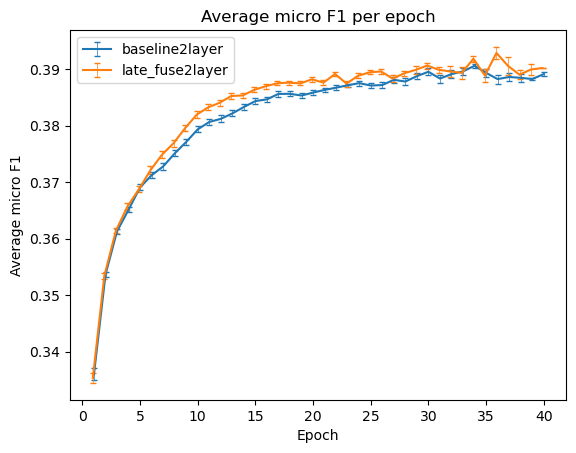

In [13]:
import matplotlib.pyplot as plt

# Create slightly offset x-values for each dataset
x1 = np.arange(len(avg_per_epoch_baseline2layer)) +1
x2 = np.arange(len(avg_per_epoch_late_fuse2layer)) +1 - 0.1  # adjust the value for desired offset

plt.errorbar(x1, avg_per_epoch_baseline2layer, 
             yerr=sem_per_epoch_baseline2layer,
             elinewidth=0.5,
             capsize=2,
             label='baseline2layer')
plt.errorbar(x2, avg_per_epoch_late_fuse2layer, 
             yerr=sem_per_epoch_late_fuse2layer, 
             elinewidth=0.5,
             capsize=2,
             label='late_fuse2layer')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average micro F1')
plt.title('Average micro F1 per epoch')
plt.savefig('average_micro_f1_per_epoch_with_error_bars.png')

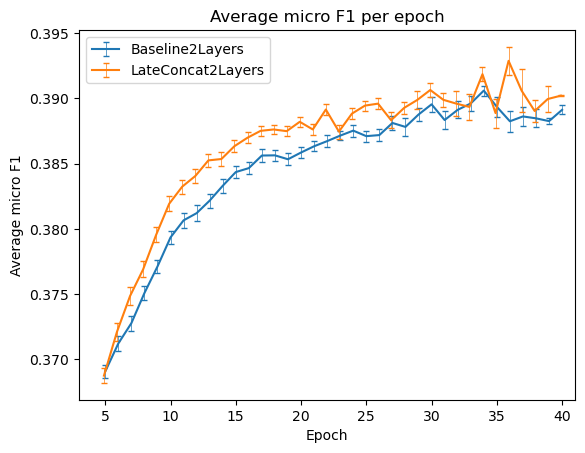

In [18]:
# plot from epoch START_EPOCH onwards
START_EPOCH = 4 # zero indexed
plt.errorbar(x1[START_EPOCH:], avg_per_epoch_baseline2layer[START_EPOCH:], 
             yerr=sem_per_epoch_baseline2layer[START_EPOCH:],
             elinewidth=0.5,
             capsize=2,
             label='Baseline2Layers')
plt.errorbar(x2[START_EPOCH:], avg_per_epoch_late_fuse2layer[START_EPOCH:], 
             yerr=sem_per_epoch_late_fuse2layer[START_EPOCH:],
             elinewidth=0.5,
             capsize=2,
             label='LateConcat2Layers')
plt.legend()
plt.xlabel('Epoch')
plt.xlim(START_EPOCH-1, max(len(avg_per_epoch_baseline2layer), len(avg_per_epoch_late_fuse2layer))+1)
plt.ylabel('Average micro F1')
plt.title('Average micro F1 per epoch')
plt.savefig(f'average_micro_f1_per_epoch_with_error_bars_from_epoch_{START_EPOCH+1}.png')


In [22]:
# perform wilcoxon signed-rank paired difference test
from scipy.stats import wilcoxon

print("Performing Wilcoxon signed-rank test on the average micro F1 per epoch")
stat, p = wilcoxon(avg_per_epoch_late_fuse2layer, avg_per_epoch_baseline2layer, alternative='greater')
print('Statistics=%f, p=%f' % (stat, p))

Performing Wilcoxon signed-rank test on the average micro F1 per epoch
Statistics=789.000000, p=0.000000
